In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 

In [28]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape 

(2477, 2)

In [29]:
redmi = pd.read_csv('ReviewDetails.csv')
redmi.head(3)

,asin,product_title,average_rating,review_author,reviewed_product_attribute,review_rating,review_date,reviewed_country,review_text,review_comment_count,review_header,no_of_people_reacted_helpful,author_profile_url,url,brand,review_url
0,B07YQ58NPF,Xiaomi Redmi Note 8 Pro 128GB Hybrid Dual-SIM ...,4.6,Amazon Customer,Color: Gray | Size: 128 GB,5.0,"November 24, 2019",United States,"Muy buen equipo, viene el cargador de corrient...",NaN,Excelente funcionamiento,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07YQ58...,Xiaomi,https://www.amazon.com/gp/customer-reviews/RDP...
1,B07YQ58NPF,Xiaomi Redmi Note 8 Pro 128GB Hybrid Dual-SIM ...,4.6,stuard n.,Color: Gray | Size: 128 GB,5.0,"February 26, 2020",United States,This phone is amazing as far as the graphic de...,NaN,Worth a buy in comparison to other phones of t...,1.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07YQ58...,Xiaomi,https://www.amazon.com/gp/customer-reviews/R2U...
2,B07YQ58NPF,Xiaomi Redmi Note 8 Pro 128GB Hybrid Dual-SIM ...,4.6,Brook,Color: Gray | Size: 128 GB,3.0,"January 03, 2020",United States,I just found out that although the Redmi LTE i...,NaN,REDMI NOTE 8 PRO & 4G LTE,16.0,https://www.amazon.com/gp/profile/amzn1.accoun...,https://www.amazon.com/product-reviews/B07YQ58...,Xiaomi,https://www.amazon.com/gp/customer-reviews/R2D...


In [30]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(redmi.review_text))
sentences[5:15] 

['My only qualm is whether the price is justifiable, as the battery seems to drain sooner than some of my other, cheaper yet just as capable phones.',
 "I just found out that although the Redmi LTE is a 4G LTE phone , it isn't compatible with Extended Range LTE & Voice Over LTE!",
 "So I can't use the phone's full capacity with the t-mobile network in the US.",
 "What does Xiaomi mean by 4G LTE if the Redmi Note 8 PRO isn't compatible with the above network ?",
 'Really disappointed !',
 'Excellent phone, very nice photos, battery long life and a lot of good things.',
 'I recommend it.',
 'Great phone.',
 'Negatives are strangeness of the miui for someone used to "standard" Android, and huge amount of BLOATWARE and ads due to Mi and Google duplication.',
 'BLOATWARE and ads are reason for 4 Stars not 5.']

In [31]:
df = pd.DataFrame(sentences, columns=['sentence'])
df 

,sentence
0,"Muy buen equipo, viene el cargador de corrient..."
1,This phone is amazing as far as the graphic de...
2,It is fast enough that most users will not com...
3,The camera is just as good as promoted.
4,the overall experience so far (two weeks into ...
...,...
725,"Good phone, good performance, good battery life."
726,Would recommend it.
727,Very please with the purchase Overall phone is...
728,"but without basic function ""call recording""."


In [33]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [34]:
calculate_sentiment(text = 'amazing') 

4

In [37]:
df['sentiment_value'] = df['sentence'].apply(calculate_sentiment) 

In [38]:
df['word_count'] = df['sentence'].str.split().apply(len)
df['word_count'].head(10) 

0    21
1    15
2    31
3     8
4    12
5    27
6    26
7    15
8    20
9     3
Name: word_count, dtype: int64

In [39]:
df 

,sentence,sentiment_value,word_count
0,"Muy buen equipo, viene el cargador de corrient...",0,21
1,This phone is amazing as far as the graphic de...,4,15
2,It is fast enough that most users will not com...,-2,31
3,The camera is just as good as promoted.,4,8
4,the overall experience so far (two weeks into ...,0,12
...,...,...,...
725,"Good phone, good performance, good battery life.",9,7
726,Would recommend it.,2,3
727,Very please with the purchase Overall phone is...,4,9
728,"but without basic function ""call recording"".",0,6


In [40]:
df.sort_values(by='sentiment_value').tail(10) 

,sentence,sentiment_value,word_count
674,Good Great phone had to change my original rev...,10,38
343,Great fan of Xioami and this product just adds...,10,17
110,Great price for a incredible cell phone and wo...,11,19
425,"For less than $250, I got a lightning fast, su...",12,21
569,"Fast, Amazing camera and camera app, I in love...",13,27
558,Shear wastage of money Love it The phone itsel...,14,55
417,"The phone is fast, holds charge pretty nicely ...",15,45
101,seller is not returning full amount and asking...,15,69
714,"Loving the ips screen, and green color Great p...",15,23
169,"She loved it, just got it cant say much about ...",17,69


In [41]:
df['sentiment_value'].describe() 

count    730.000000
mean       1.165753
std        2.816993
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [43]:
df[df['sentiment_value']<=0] 

,sentence,sentiment_value,word_count
0,"Muy buen equipo, viene el cargador de corrient...",0,21
2,It is fast enough that most users will not com...,-2,31
4,the overall experience so far (two weeks into ...,0,12
6,I just found out that although the Redmi LTE i...,0,26
7,So I can't use the phone's full capacity with ...,0,15
...,...,...,...
722,And it hasn’t lagged ever since I got it.,-1,9
723,You can change the notch setting so you won’t ...,0,15
724,Nothing else to say.,0,4
728,"but without basic function ""call recording"".",0,6


In [44]:
df[df['sentiment_value']>=10] 

,sentence,sentiment_value,word_count
101,seller is not returning full amount and asking...,15,69
110,Great price for a incredible cell phone and wo...,11,19
169,"She loved it, just got it cant say much about ...",17,69
307,"I previously had a Mi A3, it was an awesome An...",10,29
343,Great fan of Xioami and this product just adds...,10,17
417,"The phone is fast, holds charge pretty nicely ...",15,45
425,"For less than $250, I got a lightning fast, su...",12,21
558,Shear wastage of money Love it The phone itsel...,14,55
569,"Fast, Amazing camera and camera app, I in love...",13,27
674,Good Great phone had to change my original rev...,10,38


In [45]:
df['index']=range(0,len(df)) 

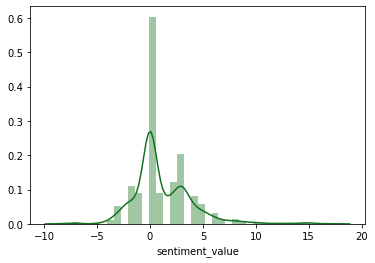

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_color_codes("dark")
sns.distplot(df['sentiment_value'],color='g')

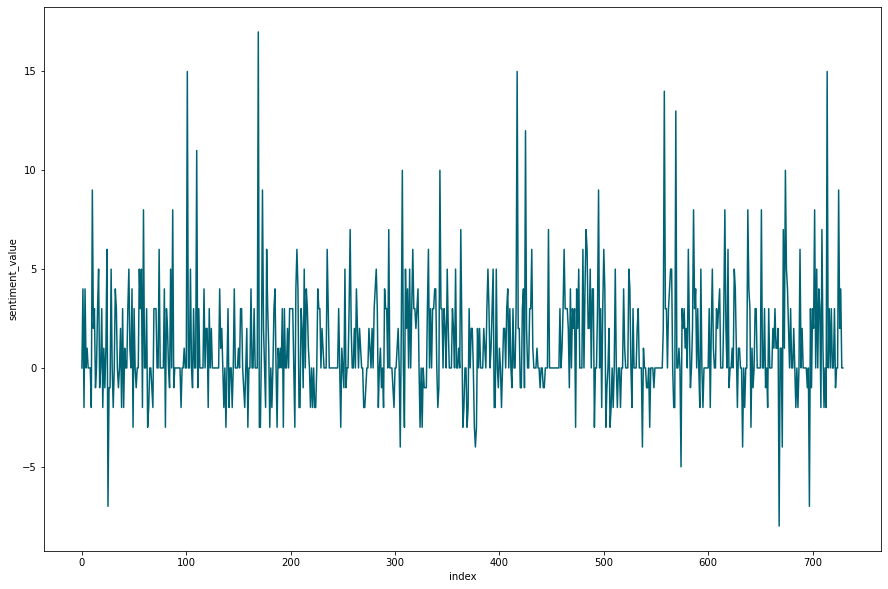

In [74]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=df,color='c') 

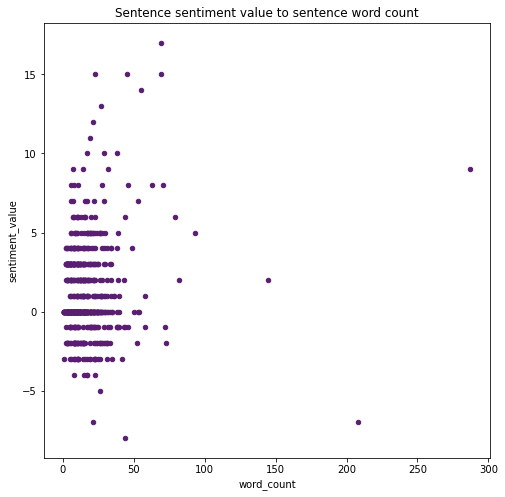

In [76]:
df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count',color='m')